### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create unity environment
env = UnityEnvironment(file_name="E:/code/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
banana_action_size = brain.vector_action_space_size
print('Number of actions:', banana_action_size)

# number of states
state = env_info.vector_observations[0]
banana_state_size = len(state)
print('Number of states:', banana_state_size)

Number of actions: 4
Number of states: 37


### 5. Train the Agent with DQN

In [9]:
from dqn_agent import Agent

agent = Agent(state_size = banana_state_size, action_size = banana_action_size, seed = 0)

In [36]:
def dqn(n_episodes=200, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                          # list containing scores from each episode
    scores_window = deque(maxlen=100)    # last 100 scores
    eps = eps_start                      # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, eps).astype(np.int32)                     # select an action
            env_info = env.step(action)[brain_name]               # send the action to the environment
            next_state = env_info.vector_observations[0]          # get the next state
            reward = env_info.rewards[0]                          # get the reward
            done = env_info.local_done[0]                         # see if episode has finished
            agent.step(state, action, reward, next_state, done)   # agent steps to process
            state = next_state                                    # roll over the state to next time step
            score += reward
            if done:
                break
        scores_window.append(score)        # save most recent score
        scores.append(score)               # save most recent score
        eps = max(eps_end, eps_decay*eps)  # decrease epsilon
        print('\rEpsiode {} \tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpsiode {} \tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

Epsiode 100 	Average Score: 1.44
Epsiode 200 	Average Score: 4.85
Epsiode 300 	Average Score: 8.57
Epsiode 400 	Average Score: 10.50
Epsiode 481 	Average Score: 13.04
Environment solved in 381 episodes!	Average Score: 13.04


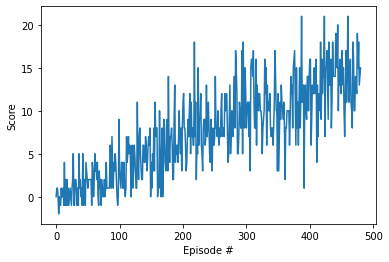

In [37]:
scores = dqn(n_episodes=500)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

### 6. Watch a Smart Agent!

In [40]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    
    while True:
        action = agent.act(state).astype(np.int32)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        state = next_state
        score+=reward
        if done:
            break

    print("\rEpisode {} \tScore: {:.2f}".format(i, score))

Episode 0 	Score: 15.00
Episode 1 	Score: 6.00
Episode 2 	Score: 21.00


In [41]:
env.close()